In [4]:
import json
import pandas as pd
from textblob import TextBlob

def read_json(json_file: str)->list:
    """
    json file reader to open and read json files into a list
    Args:
    -----
    json_file: str - path of a json file
    
    Returns
    -------
    length of the json file and a list of json
    """
    
    tweets_data = []
    for tweets in open(json_file,'r'):
        tweets_data.append(json.loads(tweets))
    
    
    return len(tweets_data), tweets_data

class TweetDfExtractor:
    """
    this function will parse tweets json into a pandas dataframe
    
    Return
    ------
    dataframe
    """
    def __init__(self, tweets_list):
        
        self.tweets_list = tweets_list

    # an example function
    def find_statuses_count(self)->list:
        statuses_count = []
        for status in self.tweets_list:
            if status['user'] == 'statuses_count':
                statuses_count.append(status)
        
        
    def find_full_text(self)->list:
    
        text = [] 
        for texts in self.tweets_list:
            if 'retweeted_status' in texts.keys() and 'extended_tweet' in texts['retweeted_status'].keys():
                text.append(texts['retweeted_status']['extended_tweet']['full_text'])
            else:
                text.append('empty')

        return text
    
    def find_sentiments(self, text)->list:
        polarity = []
        subjectivity = []
        
        for i in text:
            blob = TextBlob(i)
            sentiments = blob.sentiment
            polarity.append(sentiments.polarity)
            subjectivity.append(sentiments.subjectivity)
        
        return polarity, subjectivity

    def find_created_time(self)->list:
        created_at = []
        for tweets in self.tweets_list:
            if 'created_at' in tweets.keys():
                created_at.append(tweets['created_at'])
   
        return created_at

    def find_source(self)->list:
        source = []
        for tweets in self.tweets_list:
            if 'source' in tweets.keys():
                source.append(tweets['source'])

        return source

    def find_screen_name(self)->list:
        screen_name = []
        for tweets in self.tweets_list:
            if 'screen_name' in tweets['user'].keys():
                screen_name.append(tweets['user']['screen_name'])
        return screen_name

    def find_followers_count(self)->list:
        followers_count = []
        for tweets in self.tweets_list:
            if 'followers_count' in tweets['user'].keys():
                followers_count.append(tweets['user']['followers_count'])
        return followers_count

    def find_friends_count(self)->list:
        friends_count = []
        for tweets in self.tweets_list:
            if 'friends_count' in tweets['user'].keys():
                friends_count.append(tweets['user']['friends_count'])
                
        return friends_count

    def is_sensitive(self)->list:
        try:
            is_sensitive = []
            for tweets in self.tweets_list:
                if 'possibly_sensitive' in tweets.keys():
                    is_sensitive.append(tweets['possibly_sensitive'])
                else:
                    is_sensitive.append(0)
                    
                    
        except KeyError:
            is_sensitive = None

        return is_sensitive

    def find_favourite_count(self)->list:
        favorite_count = []
        for tweets in self.tweets_list:
            if 'retweeted_status' in tweets.keys():
                favorite_count.append(tweets['retweeted_status']['favorite_count'])
            else: 
                favorite_count.append(0)

        return favorite_count
    
#         favorite_count = []
#         for tweets in self.tweets_list:
#             if tweets.keys() == 'retweeted_status':
#                 favorite_count.append(tweets['retweeted_status']['favorite_count'])
#             else: 
#                 favorite_count.append(0)

#         return favorite_count
        
    
    def find_retweet_count(self)->list:
        retweet_count = []
        for tweets in self.tweets_list:
            if 'retweeted_status' in tweets.keys():
                retweet_count.append(tweets['retweeted_status']['retweet_count'])
            else: 
                retweet_count.append(0)

        return retweet_count
    
#         retweet_count = []
#         for tweets in self.tweets_list:
#             if tweets.keys() == 'retweeted_status':
#                 retweet_count.append(tweets['retweeted_status']['retweet_count'])
#             else:
#                 retweet_count.append(0)

#         return retweet_count
         

    def find_hashtags(self)->list:
        hashtags = []

        for tweets in self.tweets_list:
            hashtags.append(", ".join([hashtag_item['text'] for hashtag_item in tweets['entities']['hashtags']]))
        return hashtags
       

    def find_mentions(self)->list:
        mentions = []
        for tweets in self.tweets_list:
            mentions.append( ", ".join([mention['screen_name'] for mention in tweets['entities']['user_mentions']]))

        return mentions


    def find_location(self)->list:
        try:
            location = self.tweets_list['user']['location']
        except TypeError:
            location = ''
        
        return location
    
    def find_lang(self)->list:
        lang = []
        for tweets in self.tweets_list:
            if 'lang' in tweets.keys():
                lang.append(tweets['lang'])

        return lang
        
        
    def get_tweet_df(self, save=False)->pd.DataFrame:
        """required column to be generated you should be creative and add more features"""
        
        columns = ['created_at', 'source', 'original_text','polarity','subjectivity', 'lang', 'favorite_count',
                   'retweet_count', 'original_author', 'followers_count','friends_count','possibly_sensitive', 'hashtags', 
                   'user_mentions', 'place']
        
        created_at = self.find_created_time()
#         print(len(created_at))
        source = self.find_source()
#         print(len(source))
        text = self.find_full_text()
#         print(len(text))
        polarity, subjectivity = self.find_sentiments(text)
#         print(len(polarity))
#         print(len(subjectivity))
        lang = self.find_lang()
#         print(len(lang))
        fav_count = self.find_favourite_count()
#         print(len(fav_count))
        retweet_count = self.find_retweet_count()
#         print(len(retweet_count))
#         print(retweet_count)
        screen_name = self.find_screen_name()
#         print(len(screen_name))
        follower_count = self.find_followers_count()
#         print(len(follower_count))
        friends_count = self.find_friends_count()
#         print(len(friends_count))
        sensitivity = self.is_sensitive()
#         print(sensitivity)
        hashtags = self.find_hashtags()
#         print(len(hashtags))
        mentions = self.find_mentions()
#         print(len(mentions))
        location = self.find_location()
#         print(len(location))
        
        data = {"created_at":created_at,'source':source,'original_text':text,'polarity':polarity,'subjectivity':subjectivity,
                'lang':lang,'favorite_count':fav_count,'retweet_count':retweet_count,'original_author':screen_name, 
                'followers_count':follower_count,'friends_count':friends_count,'possibly_sensitive':sensitivity,
                'hashtags':hashtags,'user_mentions':mentions}
#         print(data)

        df = pd.DataFrame(data)
        

        if save:
            df.to_csv('processed_tweet_data.csv', index=False)
            print('File Successfully Saved.!!!')
        
        return df

                
if __name__ == "__main__":
    # required column to be generated you should be creative and add more features
    columns = ['created_at', 'source', 'original_text','clean_text', 'sentiment','polarity','subjectivity', 'lang', 'favorite_count', 'retweet_count', 
    'original_author', 'screen_count', 'followers_count','friends_count','possibly_sensitive', 'hashtags', 'user_mentions', 'place', 'place_coord_boundaries']
    _, tweet_list = read_json("Economic_Twitter_Data.json")
    tweet = TweetDfExtractor(tweet_list)
    tweet_df = tweet.get_tweet_df() 


    # use all defined functions to generate a dataframe with the specified columns above

    

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [82]:
df = tweet_df
df

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions
0,Fri Apr 22 22:20:18 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",empty,-0.1,0.5,de,2356,355,McMc74078966,3,12,0,,nikitheblogger
1,Fri Apr 22 22:19:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",empty,-0.1,0.5,de,1985,505,McMc74078966,3,12,0,,sagt_mit
2,Fri Apr 22 22:17:28 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",empty,-0.1,0.5,de,16,4,McMc74078966,3,12,0,,"Kryptonoun, WRi007"
3,Fri Apr 22 22:17:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",empty,-0.1,0.5,de,1242,332,McMc74078966,3,12,0,"Deutschen, Spritpreisen, inflation, Abgaben",WRi007
4,Fri Apr 22 22:13:15 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",empty,-0.1,0.5,de,1329,386,McMc74078966,3,12,0,,RolandTichy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24620,Fri Apr 22 14:44:56 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",empty,-0.1,0.5,mr,2342,242,kitukalesatya,706,643,0,,waglenikhil
24621,Fri Apr 22 14:44:44 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",empty,-0.1,0.5,hi,2298,242,kitukalesatya,706,643,0,,yadavtejashwi
24622,Fri Apr 22 14:44:35 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",empty,-0.1,0.5,en,1025,203,kitukalesatya,706,643,0,,Parthtiwari25
24623,Fri Apr 22 14:44:08 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",empty,-0.1,0.5,hi,3735,301,kitukalesatya,706,643,0,,news24tvchannel


In [84]:
unwanted_rows = df[df['retweet_count'] == 'retweet_count' ].index
df.drop(unwanted_rows , inplace=True)
df = df[df['polarity'] != 'polarity']

# df = df.drop_duplicates().drop_duplicates(subset='original_text')

df = df[df['created_at'] >= '2020-12-31' ]

df['polarity'] = pd.to_numeric(df['polarity'], errors='coerce')

df['retweet_count'] = pd.to_numeric(df['retweet_count'], errors='coerce')
df['favorite_count'] = pd.to_numeric(df['favorite_count'], errors='coerce')

df = df.query("lang == 'en' ")
df

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions
38,Fri Apr 22 22:17:05 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",empty,-0.1,0.5,en,188,43,davideiacovozzi,18,55,0,"gold, silver, crypto",NorthstarCharts
39,Fri Apr 22 13:44:53 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",empty,-0.1,0.5,en,179,32,davideiacovozzi,18,55,0,,MichaelAArouet
41,Fri Apr 22 06:10:34 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",empty,-0.1,0.5,en,193,26,davideiacovozzi,18,55,False,,goldseek
42,Thu Apr 21 17:22:09 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",empty,-0.1,0.5,en,620,213,davideiacovozzi,18,55,0,,charliebilello
43,Thu Apr 21 10:32:26 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",empty,-0.1,0.5,en,1787,417,davideiacovozzi,18,55,False,,biancoresearch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24584,Fri Apr 22 15:22:56 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",empty,-0.1,0.5,en,2924,300,kitukalesatya,706,643,0,,"CHARANJITCHANNI, RajaBrar_INC, BB__Ashu"
24586,Fri Apr 22 15:22:29 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",empty,-0.1,0.5,en,14671,5006,kitukalesatya,706,643,0,,"pbhushan1, BajpayeeManoj"
24596,Fri Apr 22 15:01:27 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",empty,-0.1,0.5,en,5056,973,kitukalesatya,706,643,False,,s_shreyatweets
24599,Fri Apr 22 14:58:12 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",empty,-0.1,0.5,en,636,115,kitukalesatya,706,643,False,,tejjINC


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16472 entries, 38 to 24622
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          16472 non-null  object 
 1   source              16472 non-null  object 
 2   original_text       16472 non-null  object 
 3   polarity            16472 non-null  float64
 4   subjectivity        16472 non-null  float64
 5   lang                16472 non-null  object 
 6   favorite_count      16472 non-null  int64  
 7   retweet_count       16472 non-null  int64  
 8   original_author     16472 non-null  object 
 9   followers_count     16472 non-null  int64  
 10  friends_count       16472 non-null  int64  
 11  possibly_sensitive  16472 non-null  object 
 12  hashtags            16472 non-null  object 
 13  user_mentions       16472 non-null  object 
dtypes: float64(2), int64(4), object(8)
memory usage: 1.9+ MB


In [86]:
df.shape

(16472, 14)

In [87]:
df.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions
38,Fri Apr 22 22:17:05 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",empty,-0.1,0.5,en,188,43,davideiacovozzi,18,55,0,"gold, silver, crypto",NorthstarCharts
39,Fri Apr 22 13:44:53 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",empty,-0.1,0.5,en,179,32,davideiacovozzi,18,55,0,,MichaelAArouet
41,Fri Apr 22 06:10:34 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",empty,-0.1,0.5,en,193,26,davideiacovozzi,18,55,False,,goldseek
42,Thu Apr 21 17:22:09 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",empty,-0.1,0.5,en,620,213,davideiacovozzi,18,55,0,,charliebilello
43,Thu Apr 21 10:32:26 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",empty,-0.1,0.5,en,1787,417,davideiacovozzi,18,55,False,,biancoresearch


In [88]:
df['lang'].unique()

array(['en'], dtype=object)

In [110]:
df = df.set_index('created_at')
# df_sampled = df.sample(200)
df

,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions
created_at,,,,,,,,,,,,,
Fri Apr 22 22:17:05 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",empty,-0.1,0.5,en,188,43,davideiacovozzi,18,55,0,"gold, silver, crypto",NorthstarCharts
Fri Apr 22 13:44:53 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",empty,-0.1,0.5,en,179,32,davideiacovozzi,18,55,0,,MichaelAArouet
Fri Apr 22 06:10:34 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",empty,-0.1,0.5,en,193,26,davideiacovozzi,18,55,False,,goldseek
Thu Apr 21 17:22:09 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",empty,-0.1,0.5,en,620,213,davideiacovozzi,18,55,0,,charliebilello
Thu Apr 21 10:32:26 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",empty,-0.1,0.5,en,1787,417,davideiacovozzi,18,55,False,,biancoresearch
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fri Apr 22 15:22:56 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",empty,-0.1,0.5,en,2924,300,kitukalesatya,706,643,0,,"CHARANJITCHANNI, RajaBrar_INC, BB__Ashu"
Fri Apr 22 15:22:29 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",empty,-0.1,0.5,en,14671,5006,kitukalesatya,706,643,0,,"pbhushan1, BajpayeeManoj"
Fri Apr 22 15:01:27 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",empty,-0.1,0.5,en,5056,973,kitukalesatya,706,643,False,,s_shreyatweets


In [112]:
df.index = pd.to_datetime(df.index)
df

,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions
created_at,,,,,,,,,,,,,
2022-04-22 22:17:05+00:00,"<a href=""http://twitter.com/download/android"" ...",empty,-0.1,0.5,en,188,43,davideiacovozzi,18,55,0,"gold, silver, crypto",NorthstarCharts
2022-04-22 13:44:53+00:00,"<a href=""http://twitter.com/download/android"" ...",empty,-0.1,0.5,en,179,32,davideiacovozzi,18,55,0,,MichaelAArouet
2022-04-22 06:10:34+00:00,"<a href=""http://twitter.com/download/android"" ...",empty,-0.1,0.5,en,193,26,davideiacovozzi,18,55,False,,goldseek
2022-04-21 17:22:09+00:00,"<a href=""http://twitter.com/download/android"" ...",empty,-0.1,0.5,en,620,213,davideiacovozzi,18,55,0,,charliebilello
2022-04-21 10:32:26+00:00,"<a href=""http://twitter.com/download/android"" ...",empty,-0.1,0.5,en,1787,417,davideiacovozzi,18,55,False,,biancoresearch
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-22 15:22:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",empty,-0.1,0.5,en,2924,300,kitukalesatya,706,643,0,,"CHARANJITCHANNI, RajaBrar_INC, BB__Ashu"
2022-04-22 15:22:29+00:00,"<a href=""http://twitter.com/download/iphone"" r...",empty,-0.1,0.5,en,14671,5006,kitukalesatya,706,643,0,,"pbhushan1, BajpayeeManoj"
2022-04-22 15:01:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",empty,-0.1,0.5,en,5056,973,kitukalesatya,706,643,False,,s_shreyatweets


In [116]:
corr = df.corr()
corr

,polarity,subjectivity,favorite_count,retweet_count,followers_count,friends_count
polarity,NaN,NaN,NaN,NaN,NaN,NaN
subjectivity,NaN,NaN,NaN,NaN,NaN,NaN
favorite_count,NaN,NaN,1.000000,0.845029,-0.011048,0.011103
retweet_count,NaN,NaN,0.845029,1.000000,-0.010318,0.003550
followers_count,NaN,NaN,-0.011048,-0.010318,1.000000,-0.040616
friends_count,NaN,NaN,0.011103,0.003550,-0.040616,1.000000


<AxesSubplot:>

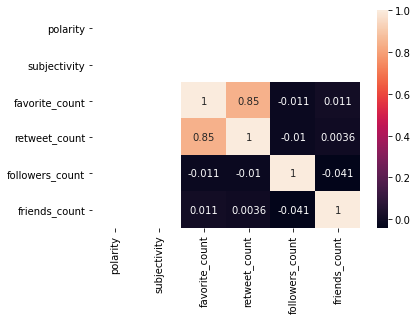

In [117]:
sns.heatmap(corr, annot=True)

In [114]:
df.describe()

,polarity,subjectivity,favorite_count,retweet_count,followers_count,friends_count
count,1.647200e+04,16472.0,1.647200e+04,16472.000000,1.647200e+04,16472.000000
mean,-1.000000e-01,0.5,3.176589e+03,622.637142,5.327892e+04,1339.298567
std,2.445340e-14,0.0,3.363174e+04,7083.390400,4.315926e+05,2970.206218
min,-1.000000e-01,0.5,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,-1.000000e-01,0.5,0.000000e+00,0.000000,1.120000e+02,113.000000
50%,-1.000000e-01,0.5,0.000000e+00,0.000000,5.370000e+02,433.000000
75%,-1.000000e-01,0.5,1.140000e+02,31.250000,2.131000e+03,1433.000000
max,-1.000000e-01,0.5,1.339072e+06,434379.000000,6.027402e+06,41866.000000


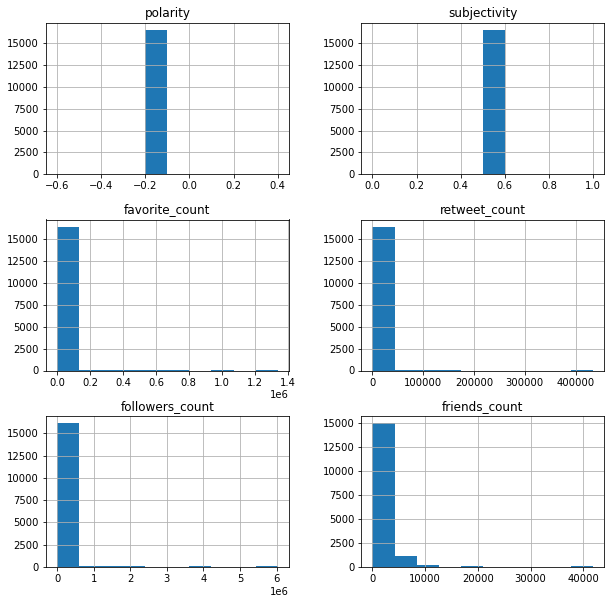

In [113]:
df.hist(figsize=(10,10))
plt.show()

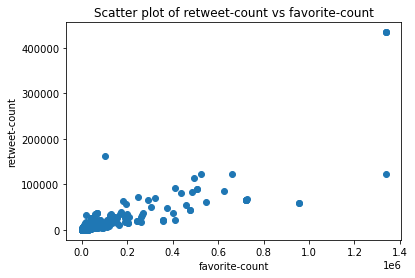

In [119]:
plt.scatter(df['favorite_count'],df['retweet_count'])
plt.title("Scatter plot of retweet-count vs favorite-count")
plt.ylabel('retweet-count')
plt.xlabel('favorite-count')
plt.show()